In [1]:
pip install git+https://github.com/pykeen/pykeen.git

  Cloning https://github.com/pykeen/pykeen.git to /tmp/pip-req-build-st96ns9o
  Running command git clone -q https://github.com/pykeen/pykeen.git /tmp/pip-req-build-st96ns9o
  Created wheel for pykeen: filename=pykeen-1.4.1.dev0-cp37-none-any.whl size=415491 sha256=3ce35977efa384fc312f968ce7c7c88ecf2b9f8232f5dc02f8f1f534814f9f6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ac7b4rf7/wheels/74/a1/d4/48d8d9b30656b3fd0109317017fac61feee101d27c2203c179
Successfully built pykeen


In [2]:
import getpass
import os
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import pykeen
import torch
from pykeen.pipeline import pipeline

%matplotlib inline

In [3]:
print(sys.version)

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [4]:
print(time.asctime())

Mon Mar 22 03:46:37 2021


In [5]:
print(getpass.getuser())

root


In [6]:
print(pykeen.get_version(with_git_hash=True))

1.4.1-dev-UNHASHED


In [7]:
from google.colab import files
uplaod=files.upload()

Saving test1.txt to test1 (1).txt
Saving train1.txt to train1 (1).txt


In [110]:
TRAIN_PATH= 'train1.txt'
TEST_PATH='test1.txt'
result = pipeline(
    training=TRAIN_PATH, 
    testing=TEST_PATH,
    model='RotatE',
    random_seed=1235,
    device='gpu',
    training_kwargs=dict(num_epochs=100),  # Shouldn't take more than a minute or two on a nice computer
)

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=8.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


In [43]:
#result.plot()

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
model_save_name = 'family_embedding-colab_1'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)

In [80]:
save_location = F"/content/gdrive/My Drive/family_Embedding_KG"  # relative to here
result.save_to_directory(save_location)
os.listdir(save_location)

['metadata.json', 'results.json', 'trained_model.pkl']

In [81]:
# How to look at the model
model = result.model
model

ConvE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(3143, 200)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(726, 200)
  )
  (bias_term): Embedding(
    (_embeddings): Embedding(3143, 1)
  )
  (inp_drop): Dropout(p=0.2, inplace=False)
  (hidden_drop): Dropout(p=0.3, inplace=False)
  (feature_map_drop): Dropout2d(p=0.2, inplace=False)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=10368, out_features=200, bias=True)
)

In [82]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=3143, num_relations=726, num_triples=1967, inverse_triples=False, path="/content/train1.txt")

In [83]:
model.triples_factory

TriplesFactory(num_entities=3143, num_relations=726, num_triples=1967, inverse_triples=False, path="/content/train1.txt")

AttributeError: ignored

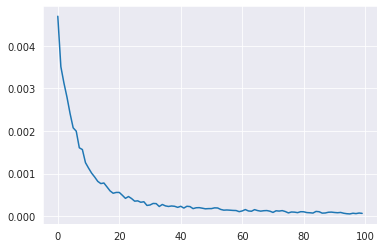

In [84]:
result.plot_losses()
plt.show()

In [85]:
tf.triples

array([['"Norwegian Herman ""Jackrabbit"" Smith-Johannsen"',
        'popularized', 'cross - country skiing'],
       ['"candidates.""The university"', 'joined', 'Project Hero'],
       ['"health care economy"".In 2016 NHS England"', 'organised',
        'geographical division'],
       ...,
       ['Überdruckmedizin e. V. German standards', 'include',
        'Medical Examiner of Divers'],
       ['Віцебскі', 'дзяржаўны', 'медыцынскі ўніверсітэт'],
       ['Гродненскі', 'Russian', 'медыцынскі ўніверсітэт']], dtype='<U126')

In [86]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,tail,avg,adjusted_mean_rank,0.744877
1,both,avg,adjusted_mean_rank,0.748073
2,head,avg,adjusted_mean_rank,0.751268
3,tail,avg,mean_rank,1170.875000
4,tail,avg,mean_reciprocal_rank,0.313287
5,tail,avg,hits_at_1,0.250000
6,tail,avg,hits_at_3,0.375000
7,tail,avg,hits_at_5,0.375000
8,tail,avg,hits_at_10,0.375000
9,tail,worst,mean_rank,1170.875000


In [87]:

tf.entity_word_cloud()

In [88]:

tf.relation_word_cloud()

In [89]:
q=model.get_tail_prediction_df(head_label ='Norwegian Herman', relation_label='Jackrabbit',remove_known= False)

KeyError: ignored

In [90]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(q)

NameError: ignored

In [122]:
# How to look at the model
model = result.model
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(3143, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(726, 400)
  )
)

In [123]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=3143, num_relations=726, num_triples=1967, inverse_triples=False, path="/content/train1.txt")

In [124]:
tf.triples

array([['"Norwegian Herman ""Jackrabbit"" Smith-Johannsen"',
        'popularized', 'cross - country skiing'],
       ['"candidates.""The university"', 'joined', 'Project Hero'],
       ['"health care economy"".In 2016 NHS England"', 'organised',
        'geographical division'],
       ...,
       ['Überdruckmedizin e. V. German standards', 'include',
        'Medical Examiner of Divers'],
       ['Віцебскі', 'дзяржаўны', 'медыцынскі ўніверсітэт'],
       ['Гродненскі', 'Russian', 'медыцынскі ўніверсітэт']], dtype='<U126')

In [94]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(tf.triples)

[['"Norwegian Herman ""Jackrabbit"" Smith-Johannsen"' 'popularized'
  'cross - country skiing']
 ['"candidates.""The university"' 'joined' 'Project Hero']
 ['"health care economy"".In 2016 NHS England"' 'organised'
  'geographical division']
 ...
 ['Überdruckmedizin e. V. German standards' 'include'
  'Medical Examiner of Divers']
 ['Віцебскі' 'дзяржаўны' 'медыцынскі ўніверсітэт']
 ['Гродненскі' 'Russian' 'медыцынскі ўніверсітэт']]


In [95]:
tf.triples

array([['"Norwegian Herman ""Jackrabbit"" Smith-Johannsen"',
        'popularized', 'cross - country skiing'],
       ['"candidates.""The university"', 'joined', 'Project Hero'],
       ['"health care economy"".In 2016 NHS England"', 'organised',
        'geographical division'],
       ...,
       ['Überdruckmedizin e. V. German standards', 'include',
        'Medical Examiner of Divers'],
       ['Віцебскі', 'дзяржаўны', 'медыцынскі ўніверсітэт'],
       ['Гродненскі', 'Russian', 'медыцынскі ўніверсітэт']], dtype='<U126')

In [96]:
from pykeen.triples import TriplesFactory
test_tf=TriplesFactory.from_path('test1.txt')
test_tf=test_tf.mapped_triples.to(model.device)

In [98]:
model.get_all_prediction_df(testing=test_tf, batch_size=100, k=100)

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score,in_training,in_testing
0,93,58%,604,set out,2212,membership base,8.628574,False,False
1,10,"1,000 copies",148,conducted,2271,national consultation,8.501061,False,False
2,93,58%,116,certifies,2212,membership base,8.424713,False,False
3,55,23.9 percent,376,involves,3074,use,8.351924,False,False
4,28,15th WONCA World Rural Health conference,548,registers,1898,guidelines,8.253220,False,False
...,...,...,...,...,...,...,...,...,...
95,93,58%,688,treated,2212,membership base,7.488628,False,False
96,28,15th WONCA World Rural Health conference,288,find,1898,guidelines,7.488466,False,False
97,51,208 condition-treatment pairs,170,contributes,2524,programs,7.486632,False,False
98,55,23.9 percent,308,funded,3074,use,7.485894,False,False


In [99]:
##Get HEad prediction 

In [134]:
from pykeen.models.predict import get_head_prediction_df
get_head_prediction_df(result.model,'play','pharmacists')

,head_id,head_label,score,in_training
2794,2794,students,-4.494213,False
1619,1619,degree,-4.635094,False
448,448,Examples,-4.643879,False
1955,1955,honor,-4.670076,False
1055,1055,The British Medical Association,-4.702169,False
...,...,...,...,...
2670,2670,semi autonomous Association,-5.678145,False
490,490,GP Fundholding scheme,-5.684346,False
193,193,Australian students,-5.690166,False
769,769,Members,-5.690974,False
